#Selected Topics 1 - Machine Learning
---
##Project 1: Debate <br> Juan Pablo Morales Durante 171657
## Ximena Vazquez Mellado Flores 171319
## Alejandro Sánchez González 167299
---




### Mounting drive to access the database from Google Drive
The use of Google Drive and Google Collab is strongly recommended, as the storage of the audio waves could be slow to download.

In [ ]:
from google.colab import drive #Mount drive account
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Establishing paths to recover the sample files.

In [ ]:
projectPath = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 1 - Playground/ICA codes/Samples/'
s1_file = projectPath + "qjano.wav"
s2_file = projectPath + "qxime.wav"
s3_file = projectPath + "qjp.wav"

Import needed libraries. Install with !pip if required.

In [ ]:
import numpy as np                                #Numerical and matrix operations
import matplotlib.pyplot as plt                   #Plotting signals
import librosa                                    #Manipulate audio signals
import soundfile as sf                            #Read and write audio files
from IPython.display import Audio                 #Play audios on Jupyter
from sklearn.decomposition import FastICA         #ICA library
from sklearn.preprocessing import StandardScaler  #normalize data
from scipy.signal import butter, filtfilt         #filter noise

Load and display original files (in wav format).

In [ ]:
# Load files
signal1, samp_rate1 = librosa.load(s1_file)
signal2, samp_rate2 = librosa.load(s2_file)
signal3, samp_rate3 = librosa.load(s3_file)

# Display audios
print("Original 1: Jano ")
display(Audio(signal1, rate=samp_rate1))
print("Original 2: Xime")
display(Audio(signal2, rate=samp_rate2))
print("Original 3: JP")
display(Audio(signal3, rate=samp_rate3))

Output hidden; open in https://colab.research.google.com to view.

Plot the Signals.

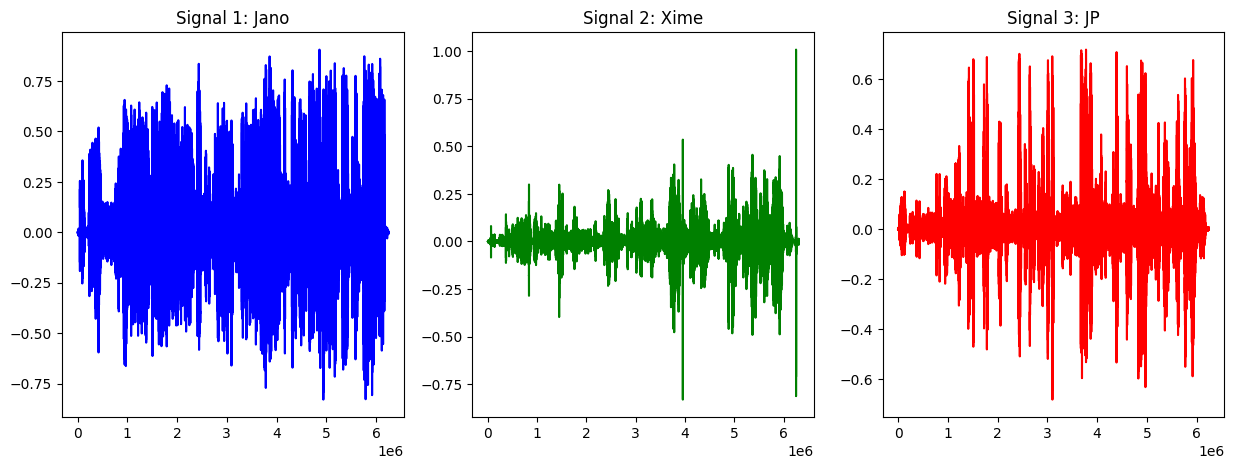

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(signal1, color='b')
axs[0].set_title("Signal 1: Jano")

axs[1].plot(signal2, color='g')
axs[1].set_title("Signal 2: Xime")

axs[2].plot(signal3, color='r')
axs[2].set_title("Signal 3: JP")

plt.show()

Preprocess before ICA

In [ ]:

length_of_shorter = min(len(signal1), len(signal2), len(signal3)) #Find shortest sample

signal_comb = np.vstack([signal1[:length_of_shorter], signal2[:length_of_shorter],signal3[:length_of_shorter]]).T

combined_audio = np.mean(signal_comb, axis=1)# Obtain the mix through mean


print("Mixed audio: ")
display(Audio(combined_audio, rate=samp_rate1))

plt.figure()
plt.title("Mix of source signals")
plt.plot(combined_audio, color='orange')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Applying ICA

In [ ]:
# Standardize the data before ICA
scaler = StandardScaler()
signal_comb = scaler.fit_transform(signal_comb)

# Use FastICA function to separate the signals into the original sources
ica = FastICA(n_components=3, algorithm='deflation')
separated = ica.fit_transform(signal_comb)

# Extract new sounds
separated_1 = separated[:, 0] / np.max(np.abs(separated[:, 0]))
separated_2 = separated[:, 1] / np.max(np.abs(separated[:, 1]))
separated_3 = separated[:, 2] / np.max(np.abs(separated[:, 2]))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Display the new audios

In [ ]:
# Displaying audio for separated signals
print("Separation 1: ")
display(Audio(separated_1, rate=samp_rate1))

print("Separation 2: ")
display(Audio(separated_2, rate=samp_rate2))

print("Separation 3: ")
display(Audio(separated_3, rate=samp_rate3))

Output hidden; open in https://colab.research.google.com to view.

Display the plots of the new obtained sources

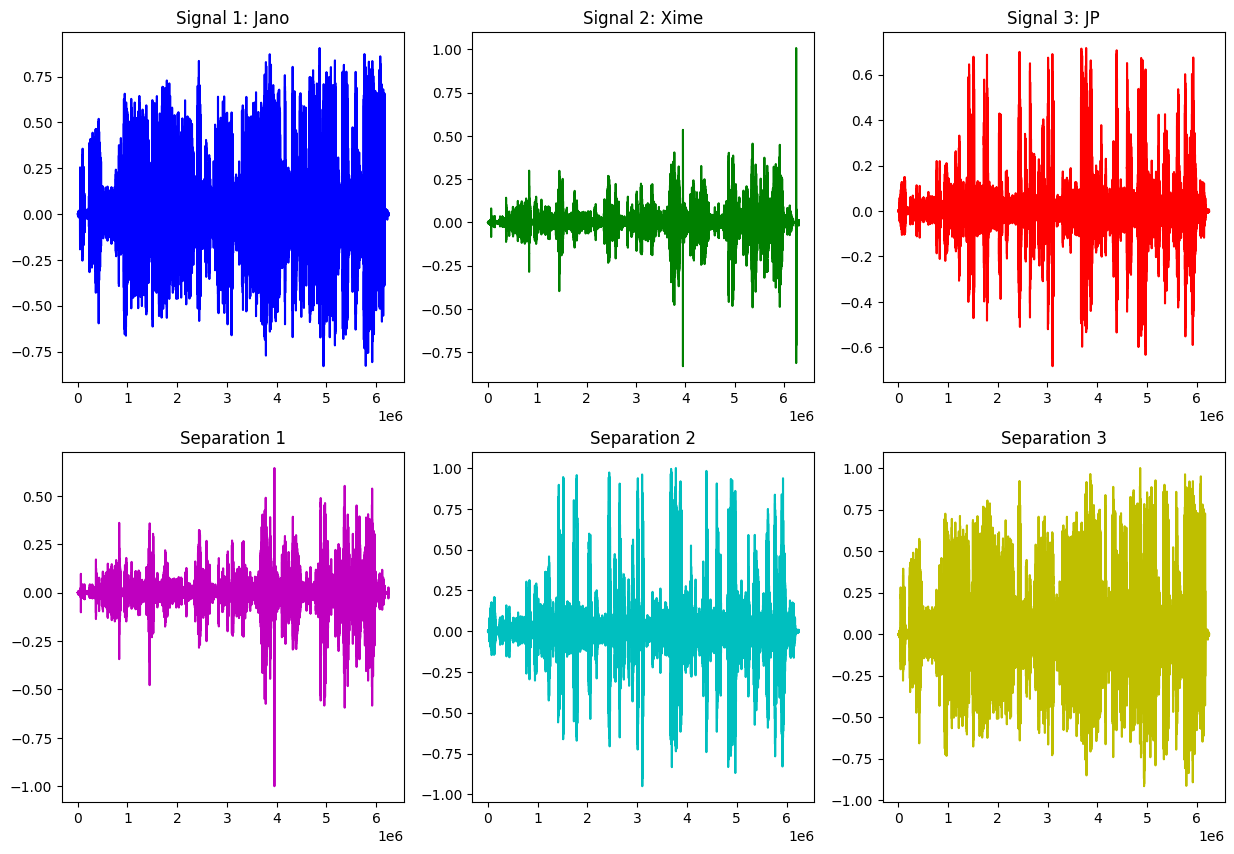

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].plot(signal1, color='b')
axs[0, 0].set_title("Signal 1: Jano")

axs[0, 1].plot(signal2, color='g')
axs[0, 1].set_title("Signal 2: Xime")

axs[0, 2].plot(signal3, color='r')
axs[0, 2].set_title("Signal 3: JP")

axs[1, 0].plot(separated_1, color='m')
axs[1, 0].set_title("Separation 1")

axs[1, 1].plot(separated_2, color='c')
axs[1, 1].set_title("Separation 2")

axs[1, 2].plot(separated_3, color='y')
axs[1, 2].set_title("Separation 3")

plt.show()